In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df=pd.read_csv("/content/concertriccir2.csv")
df.rename(columns={'7.003345706103683010e-01':'x','-2.470675778972781789e-01':'y','0.000000000000000000e+00':'Target'},inplace=True)
df

,x,y,Target
0,-3.950019,2.740080,1.0
1,0.150222,-2.157638,1.0
2,-1.672050,-0.941519,1.0
3,2.560483,-1.846577,1.0
4,-1.724979,3.463930,1.0
...,...,...,...
494,2.177895,2.984489,1.0
495,1.778905,2.869205,1.0
496,0.894180,3.069959,0.0
497,0.849439,3.875435,0.0


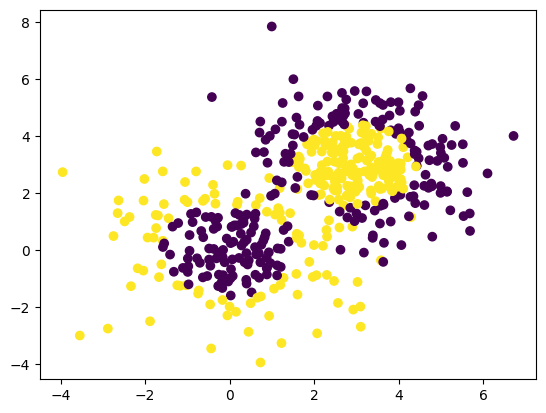

In [8]:
plt.scatter(df['x'],df['y'],c=df['Target'])

In [10]:
X=df[['x','y']]
y=df['Target']
X

,x,y
0,-3.950019,2.740080
1,0.150222,-2.157638
2,-1.672050,-0.941519
3,2.560483,-1.846577
4,-1.724979,3.463930
...,...,...
494,2.177895,2.984489
495,1.778905,2.869205
496,0.894180,3.069959
497,0.849439,3.875435


In [11]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [13]:
model=Sequential()
model.add(Dense(2,activation='relu',input_dim=2))
model.add(Dense(2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [19]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=100,validation_data=(x_test,y_test))

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - accuracy: 0.6597 - loss: 0.6841 - val_accuracy: 0.4400 - val_loss: 0.7090
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6343 - loss: 0.6990 - val_accuracy: 0.4900 - val_loss: 0.7086
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6556 - loss: 0.6752 - val_accuracy: 0.4900 - val_loss: 0.7084
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6395 - loss: 0.6810 - val_accuracy: 0.4800 - val_loss: 0.7083
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6395 - loss: 0.6903 - val_accuracy: 0.4600 - val_loss: 0.7086
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6719 - loss: 0.6631 - val_accuracy: 0.4900 - val_loss: 0.7092
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6618 - loss: 0.6795 - val_accuracy: 0.4900 - val_loss: 0.7100
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6552 - loss: 0.6894 - val_accuracy: 0.500

In [23]:
#Now we will use batch Normalisation
model2=Sequential()
model2.add(Dense(2,activation='relu',input_dim=2))
model2.add(BatchNormalization())
model2.add(Dense(2,activation='relu'))
model2.add(BatchNormalization())
model2.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model2.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])
history2=model.fit(x_train,y_train,epochs=200,validation_data=(x_test,y_test))

Epoch 1/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6722 - loss: 0.5892 - val_accuracy: 0.5800 - val_loss: 0.7041
Epoch 2/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6812 - loss: 0.5856 - val_accuracy: 0.5800 - val_loss: 0.7065
Epoch 3/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6811 - loss: 0.6186 - val_accuracy: 0.5700 - val_loss: 0.7086
Epoch 4/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7132 - loss: 0.5751 - val_accuracy: 0.5800 - val_loss: 0.7083
Epoch 5/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6976 - loss: 0.5620 - val_accuracy: 0.5800 - val_loss: 0.7073
Epoch 6/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6996 - loss: 0.5810 - val_accuracy: 0.5800 - val_loss: 0.7040
Epoch 7/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7205 - loss: 0.5739 - val_accuracy: 0.5800 - val_loss: 0.7079
Epoch 8/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6823 - loss: 0.5917 - val_accuracy: 0.5700 -

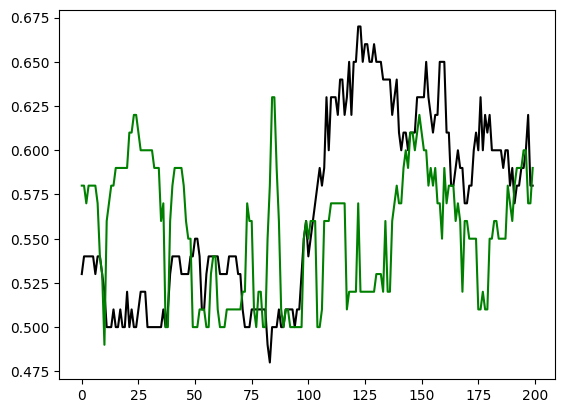

In [25]:
plt.plot(history.history['val_accuracy'],color='black')
plt.plot(history2.history['val_accuracy'],color='green')